## Convolutional Neural Networks (CNNs):
CNNs are a type of deep learning model designed for processing structured grid data, such as images. They consist of layers of learnable filters (also known as kernels) that scan the input data to extract hierarchical features.<p>
 Here I am using CFIR10 Image Classification data for analysis different test accuracies for different Data Augmentation methods.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import numpy as np
import random
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import random
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from keras.regularizers import l2,l1

In [51]:
import matplotlib.pyplot as plt

#### Data Loading

In [53]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
val_split = 0.1 #proportion of the training data that you want to allocate for validation
val_indices = int(len(x_train) * val_split) # to ensure that you have a whole number of samples for validation.
new_x_train, new_y_train = x_train[val_indices:], y_train[val_indices:]

x_val, y_val = x_train[:val_indices], y_train[:val_indices]


print(f"Training data samples: {len(new_x_train)}")

print(f"Validation data samples: {len(x_val)}")
print(f"Test data samples: {len(x_test)}")

Training data samples: 45000
Validation data samples: 5000
Test data samples: 10000


#### Normalization

In [54]:

new_x_train_nor = new_x_train/255
x_val_nor  = x_val/255
x_test_nor = x_test/255
print(x_train.shape)

(50000, 32, 32, 3)


In [ ]:
#### Label Prep

In [55]:
# Label Prep
from keras.src.utils.np_utils import to_categorical
total_class = len(np.unique(new_y_train))

new_y_train_hot = to_categorical( new_y_train, total_class)

y_val_hot  = to_categorical( y_val, total_class)

y_test_hot = to_categorical( y_test, total_class)

Checking the class for validation.

(array([4016., 4041., 3965., 3976., 3948., 4018., 3983., 4018., 4018.,
        4017.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

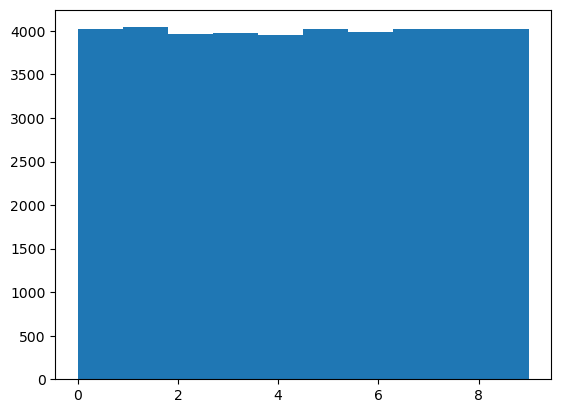

In [56]:
indx = [i for i in range(0, len(new_x_train_nor))]
random.shuffle(indx)
#indx

new_y_train_hot_1 =  []
new_x_train_nor_1 = []

small_f = 40000 # allocated length of the dataset
for i in range(small_f):
  new_x_train_nor_1.append(new_x_train_nor[indx[i]] )
  new_y_train_hot_1.append(new_y_train_hot[indx[i]] )


new_y_train_hot_1 = np.array(new_y_train_hot_1)
new_x_train_nor_1 = np.array(new_x_train_nor_1)
label_id = np.argmax(new_y_train_hot_1,-1)

plt.hist(label_id, 10)

In [19]:
import kerastuner as kt

In [91]:
filters = 48
kernel_size = 3
dropout = 0.06
l2_lambda = .01
input_shape= (32, 32, 3)
inputs = Input(shape=input_shape)
initial_learning_rate=.001


x = Conv2D(filters=filters, kernel_size=kernel_size, activation='elu', padding='same',kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda))(inputs)
    
x = MaxPooling2D()(x)
x = Conv2D(filters=filters*2,kernel_size=kernel_size, activation='elu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda))(x)
    #x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=filters*3, kernel_size=kernel_size, activation='elu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda))(x)
    #x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = MaxPooling2D()(x)
x = BatchNormalization()(x)

    # x = Conv2D(filters=filters*3,kernel_size=kernel_size, activation='elu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda))(x)
    # #x = BatchNormalization()(x)
    # x = MaxPooling2D()(x)
    # x = Conv2D(filters=filters*4, kernel_size=kernel_size, activation='elu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda))(x)
    # #x = BatchNormalization()(x)
    # x = MaxPooling2D()(x)
    # x = BatchNormalization()(x)

#     x = Conv2D(filters=filters*4,kernel_size=kernel_size, activation='elu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda))(x)
#     x = MaxPooling2D()(x)
#     x = BatchNormalization()(x) 
    
# x = Conv2D(filters=filters*4, kernel_size=kernel_size, activation='elu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda))(x)
# x = MaxPooling2D()(x)
# x = BatchNormalization()(x)
 #  
  #  x = BatchNormalization()(x)



x = Conv2D(filters=filters*4, kernel_size=kernel_size, activation='elu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda))(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dropout(dropout)(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)
    
model5 = keras.models.Model(inputs=inputs, outputs=outputs)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps=150, decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15, restore_best_weights=True)
# Compile the model
model5.compile(optimizer=optimizer ,loss='categorical_crossentropy', metrics=['accuracy'])

In [92]:
model5.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_67 (Conv2D)          (None, 32, 32, 48)        1344      
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 16, 16, 48)        0         
 ng2D)                                                           
                                                                 
 conv2d_68 (Conv2D)          (None, 16, 16, 96)        41568     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 8, 8, 96)          0         
 ng2D)                                                           
                                                                 
 conv2d_69 (Conv2D)          (None, 8, 8, 144)         124

In [81]:
model4.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_47 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_48 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 16, 16, 96)        55392     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 8, 8, 96)          0         
 ng2D)                                                    

In [77]:
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


@tf.function
def get_box(lambda_value):
    IMG_SIZE =32 # cahnge here if you need to
    cut_rat = tf.math.sqrt(1.0 - lambda_value)

    cut_w = IMG_SIZE * cut_rat  # rw
    cut_w = tf.cast(cut_w, tf.int32)

    cut_h = IMG_SIZE * cut_rat  # rh
    cut_h = tf.cast(cut_h, tf.int32)

    cut_x = tf.random.uniform((1,), minval=0, maxval=IMG_SIZE, dtype=tf.int32)  # rx
    cut_y = tf.random.uniform((1,), minval=0, maxval=IMG_SIZE, dtype=tf.int32)  # ry

    boundaryx1 = tf.clip_by_value(cut_x[0] - cut_w // 2, 0, IMG_SIZE)
    boundaryy1 = tf.clip_by_value(cut_y[0] - cut_h // 2, 0, IMG_SIZE)
    bbx2 = tf.clip_by_value(cut_x[0] + cut_w // 2, 0, IMG_SIZE)
    bby2 = tf.clip_by_value(cut_y[0] + cut_h // 2, 0, IMG_SIZE)

    target_h = bby2 - boundaryy1
    if target_h == 0:
        target_h += 1

    target_w = bbx2 - boundaryx1
    if target_w == 0:
        target_w += 1

    return boundaryx1, boundaryy1, target_h, target_w


@tf.function
def cutmix(train_ds_one, train_ds_two):
    (image1, label1), (image2, label2) = train_ds_one, train_ds_two
    IMG_SIZE = image1.shape[0]
    alpha = [0.25]
    beta = [0.25]

    # Get a sample from the Beta distribution
    lambda_value = sample_beta_distribution(1, alpha, beta)

    # Define Lambda
    lambda_value = lambda_value[0][0]

    # Get the bounding box offsets, heights and widths
    boundaryx1, boundaryy1, target_h, target_w = get_box(lambda_value)

    # Get a patch from the second image (`image2`)
    crop2 = tf.image.crop_to_bounding_box(
        image2, boundaryy1, boundaryx1, target_h, target_w
    )
    # Pad the `image2` patch (`crop2`) with the same offset
    image2 = tf.image.pad_to_bounding_box(
        crop2, boundaryy1, boundaryx1, IMG_SIZE, IMG_SIZE
    )
    # Get a patch from the first image (`image1`)
    crop1 = tf.image.crop_to_bounding_box(
        image1, boundaryy1, boundaryx1, target_h, target_w
    )
    # Pad the `image1` patch (`crop1`) with the same offset
    img1 = tf.image.pad_to_bounding_box(
        crop1, boundaryy1, boundaryx1, IMG_SIZE, IMG_SIZE
    )

    # Modify the first image by subtracting the patch from `image1`
    # (before applying the `image2` patch)
    image1 = image1 - img1
    # Add the modified `image1` and `image2`  together to get the CutMix image
    image = image1 + image2

    # Adjust Lambda in accordance to the pixel ration
    lambda_value = 1 - (target_w * target_h) / (IMG_SIZE * IMG_SIZE)
    lambda_value = tf.cast(lambda_value, tf.float32)

    # Combine the labels of both images
    label = lambda_value * label1 + (1 - lambda_value) * label2
    return image, label

In [78]:
batch_size = 16
auto = tf.data.AUTOTUNE

def make_datasets(images, labels):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))

    dataset = dataset.shuffle(1024)
    dataset = dataset.batch(batch_size)
    return dataset.prefetch(auto)

def _augment_fn(images, labels):
    images = tf.image.random_crop(images, (32, 32, 3))
    images = tf.image.random_flip_left_right(images)
    images = tf.image.random_brightness(images, 0.9)
    return images, labels


def make_augmented_datasets(images, labels):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    dataset = dataset.shuffle(1024).map( _augment_fn, num_parallel_calls=auto)

    dataset = dataset.shuffle(1024)
    dataset = dataset.batch(batch_size)


    return dataset.prefetch(auto)

def cut_mix_data(X_traina, y_traina, batch_size ):

    train_ds_one =  tf.data.Dataset.from_tensor_slices((X_traina, y_traina)).shuffle(1024)

    train_ds_two = tf.data.Dataset.from_tensor_slices((X_traina, y_traina)).shuffle(1024)

    train_ds_two = train_ds_two.shuffle(1024).map( _augment_fn, num_parallel_calls=auto)

    train_ds = tf.data.Dataset.zip((train_ds_one, train_ds_two))

    train_dataset= (train_ds.shuffle(1024).map(cutmix,num_parallel_calls=auto).batch(batch_size ).prefetch(auto))

    return train_dataset



train_set =   cut_mix_data(new_x_train_nor_1, new_y_train_hot_1, batch_size)
val_set =   make_datasets(x_val_nor, y_val_hot)
test_set =  make_datasets(x_test_nor, y_test_hot )

In [93]:
# Train the model with the training data and validation data
history = model5.fit(train_set,epochs=100,validation_data=val_set,callbacks=[early_stopping])  # Include any necessary callbacks

# Evaluate the best model on the test set
test_loss, test_accuracy = model5.evaluate(test_set)
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/100
2500/2500 [==============================] - 189s 71ms/step - loss: 3.4279 - accuracy: 0.3286 - val_loss: 1.6173 - val_accuracy: 0.5782
Epoch 2/100
2500/2500 [==============================] - 156s 62ms/step - loss: 1.9589 - accuracy: 0.4879 - val_loss: 1.2742 - val_accuracy: 0.6934
Epoch 3/100
2500/2500 [==============================] - 160s 64ms/step - loss: 1.8164 - accuracy: 0.5409 - val_loss: 1.2022 - val_accuracy: 0.7174
Epoch 4/100
2500/2500 [==============================] - 169s 67ms/step - loss: 1.7852 - accuracy: 0.5512 - val_loss: 1.1921 - val_accuracy: 0.7228
Epoch 5/100
2500/2500 [==============================] - 163s 65ms/step - loss: 1.7810 - accuracy: 0.5533 - val_loss: 1.1870 - val_accuracy: 0.7210
Epoch 6/100
2500/2500 [==============================] - 163s 65ms/step - loss: 1.7849 - accuracy: 0.5526 - val_loss: 1.1904 - val_accuracy: 0.7220
Epoch 7/100
2500/2500 [==============================] - 143s 57ms/step - loss: 1.7806 - accuracy: 0.5560 - val_

In [94]:
print(f'Test accuracy: {(test_accuracy):.4f}')

Test accuracy: 0.7039


In [95]:
# Access test accuracy values from the history object
test_accuracies = history.history['val_accuracy']  # Test accuracies for each epoch

# Calculate maximum and mean test accuracies
max_test_accuracy = max(test_accuracies)  # Maximum test accuracy
mean_test_accuracy = sum(test_accuracies) / len(test_accuracies)  # Mean test accuracy

print(max_test_accuracy,mean_test_accuracy)

0.7228000164031982 0.7130700051784515


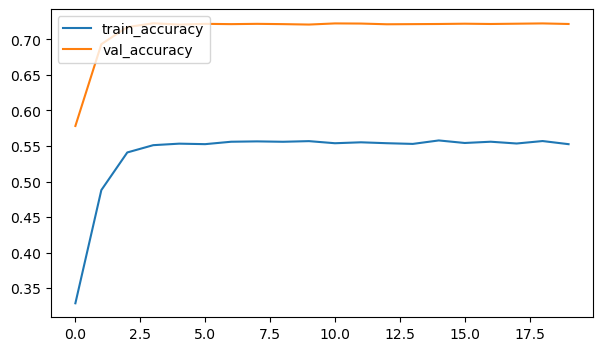

In [96]:
fig, ax = plt.subplots(figsize=(7, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')

In [29]:
print(f'Test accuracy: {(test_accuracy):.4f}')

Test accuracy: 0.7344


In [32]:
# Access test accuracy values from the history object
test_accuracies = history.history['val_accuracy']  # Test accuracies for each epoch

# Calculate maximum and mean test accuracies
max_test_accuracy = max(test_accuracies)  # Maximum test accuracy
mean_test_accuracy = sum(test_accuracies) / len(test_accuracies)  # Mean test accuracy

print(max_test_accuracy,mean_test_accuracy)

0.7864000201225281 0.7369772737676447


In [34]:
# Assuming you have already trained your model with early stopping
#history = best_model.fit(train_set, epochs=100, validation_data=val_set, callbacks=[early_stopping])

# If you want to continue training for additional epochs:
additional_epochs = 10  # Specify the number of additional epochs you want to train for

# Continue training the model for additional_epochs
history = best_model5_2.fit(train_set, epochs=additional_epochs, validation_data=val_set)



Epoch 1/10
2500/2500 [==============================] - 94s 38ms/step - loss: 1.4345 - accuracy: 0.6282 - val_loss: 0.8586 - val_accuracy: 0.7380
Epoch 2/10
2500/2500 [==============================] - 90s 36ms/step - loss: 1.4280 - accuracy: 0.6353 - val_loss: 0.7555 - val_accuracy: 0.7858
Epoch 3/10
2500/2500 [==============================] - 91s 36ms/step - loss: 1.4239 - accuracy: 0.6322 - val_loss: 0.7489 - val_accuracy: 0.7858
Epoch 4/10
2500/2500 [==============================] - 91s 36ms/step - loss: 1.4308 - accuracy: 0.6294 - val_loss: 0.8037 - val_accuracy: 0.7680
Epoch 5/10
2500/2500 [==============================] - 92s 37ms/step - loss: 1.4253 - accuracy: 0.6334 - val_loss: 0.8148 - val_accuracy: 0.7566
Epoch 6/10
2500/2500 [==============================] - 90s 36ms/step - loss: 1.4262 - accuracy: 0.6303 - val_loss: 0.7926 - val_accuracy: 0.7720
Epoch 7/10
2500/2500 [==============================] - 86s 34ms/step - loss: 1.4226 - accuracy: 0.6333 - val_loss: 0.7865 -

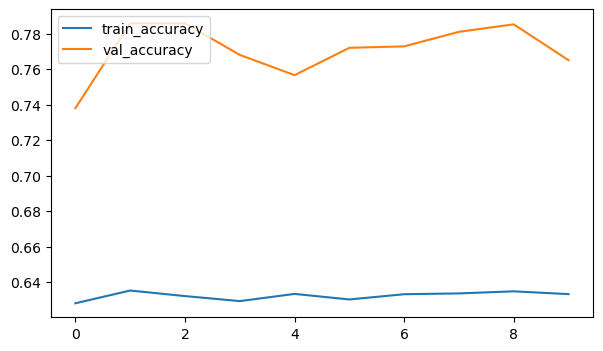

In [35]:
fig, ax = plt.subplots(figsize=(7, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')